In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split
from matplotlib import rc
rc('font',**{'family':'serif','sans-serif':['Times']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)

In [2]:
data = pd.read_csv('2phasedata.csv',sep=';')

In [3]:
data.head()

,Class_id,Class_name,Vsl,Vsg,ID,Roughness,Ang,Density_L,Density_G,Visc_L,Visc_G,ST,P,T,model
0,3,SW,0.069922,0.198811,0.0549,0.0,0.0,792.567638,26.9,0.003218,0.000013,0.015,3252.7,57.5,3
1,3,SW,0.071208,0.544205,0.0549,0.0,0.0,791.440744,26.6,0.003218,0.000013,0.015,3244.6,62.1,3
2,4,AN,0.056396,0.994842,0.0549,0.0,0.0,791.648009,26.1,0.003218,0.000013,0.015,3257.5,62.9,3
3,4,AN,0.066180,1.657200,0.0549,0.0,0.0,791.260480,25.6,0.003218,0.000013,0.015,3258.2,58.2,3
4,4,AN,0.069075,3.564760,0.0549,0.0,0.0,791.433105,24.6,0.003218,0.000013,0.015,3284.1,59.4,4


In [4]:
data['Class_id'].unique()

array([3, 4, 5, 7, 2, 6, 8, 1], dtype=int64)

In [5]:
data['Class_name'].unique()

array(['SW', 'AN', 'IN', 'BL', 'SS', 'CH', 'MS', 'DB'], dtype=object)

In [6]:
print (data.head().to_latex())

\begin{tabular}{lrlrrrrrrrrrrllr}
\toprule
{} &  Class\_id & Class\_name &       Vsl &       Vsg &      ID &  Roughness &  Ang &   Density\_L &  Density\_G &    Visc\_L &    Visc\_G &     ST &       P &     T &  model \\
\midrule
0 &         3 &         SW &  0.069922 &  0.198811 &  0.0549 &        0.0 &  0.0 &  792.567638 &       26.9 &  0.003218 &  0.000013 &  0.015 &  3252.7 &  57.5 &      3 \\
1 &         3 &         SW &  0.071208 &  0.544205 &  0.0549 &        0.0 &  0.0 &  791.440744 &       26.6 &  0.003218 &  0.000013 &  0.015 &  3244.6 &  62.1 &      3 \\
2 &         4 &         AN &  0.056396 &  0.994842 &  0.0549 &        0.0 &  0.0 &  791.648009 &       26.1 &  0.003218 &  0.000013 &  0.015 &  3257.5 &  62.9 &      3 \\
3 &         4 &         AN &  0.066180 &  1.657200 &  0.0549 &        0.0 &  0.0 &  791.260480 &       25.6 &  0.003218 &  0.000013 &  0.015 &  3258.2 &  58.2 &      3 \\
4 &         4 &         AN &  0.069075 &  3.564760 &  0.0549 &        0.0 &  0.0 &  79

Text(0.5, 0, 'Angle ($\\theta$)')

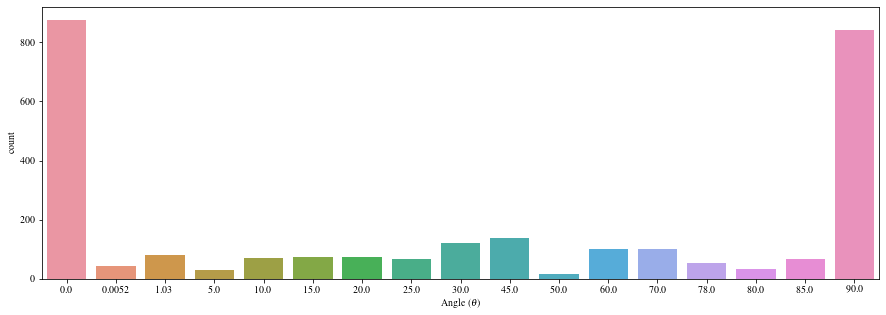

In [7]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Ang', data = data)
plt.xlabel(r'Angle ($\theta$)')

Text(0.5, 0, 'Internal Diameter ($m$)')

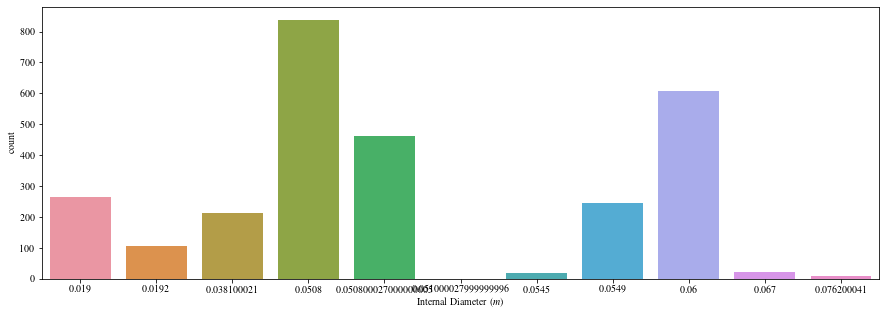

In [8]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'ID', data = data)
plt.xlabel(r'Internal Diameter ($m$)')

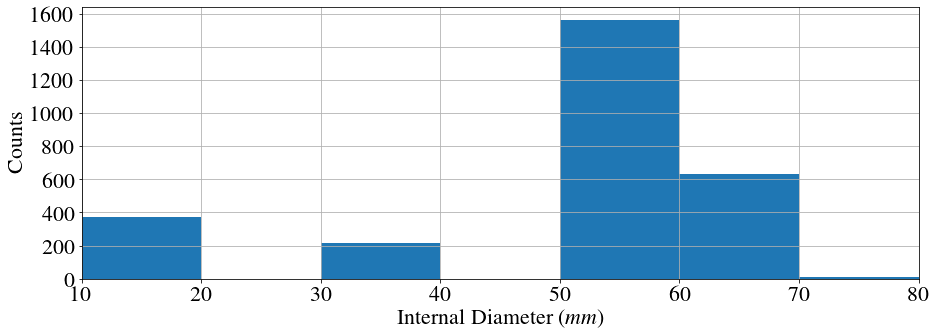

In [9]:
bins = np.linspace(data['ID'].values.min()*1000, data['ID'].values.max()*1000, 20)
bins =(10,20,30,40,50,60,70,80)
# Plot regular histograms
f=plt.figure(figsize=(15,5))
plt.hist(data['ID'].values*1000, bins, alpha=1.0)
plt.ylabel('Counts',fontsize=22)
plt.xlabel(r'Internal Diameter ($mm$)',fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlim(10,80)
plt.grid()
plt.show()
f.savefig("./fig/count_vs_ID.pdf", bbox_inches='tight')

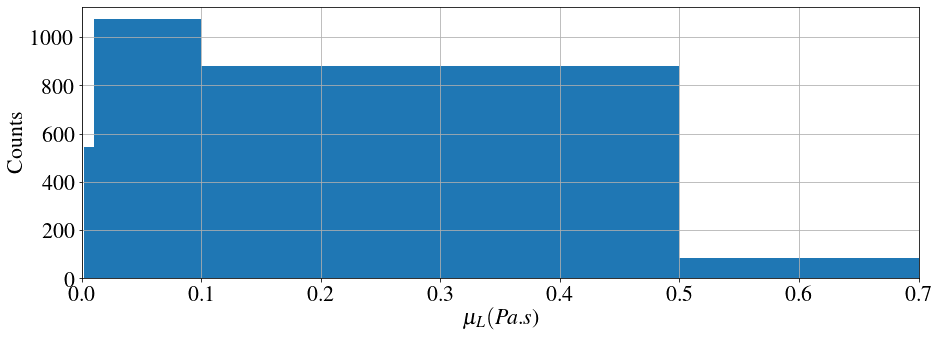

In [53]:
#bins = np.linspace(data['Visc_L'].values.min(), data['Visc_L'].values.max(), 20)
#x = np.linspace(0.019,0.08,19)
bins =(0.002,0.010,0.100,0.500,0.700)
#bins=bins/1000
# Plot regular histograms
f=plt.figure(figsize=(15,5))
plt.hist(data['Visc_L'].values, bins, alpha=1.0)
plt.ylabel('Counts',fontsize=22)
plt.xlabel(r'$\mu_L(Pa.s$)',fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlim(0.0,0.7)
plt.grid()
#plt.legend(loc='upper right')
plt.show()
f.savefig("./fig/count_vs_mul.pdf", bbox_inches='tight')

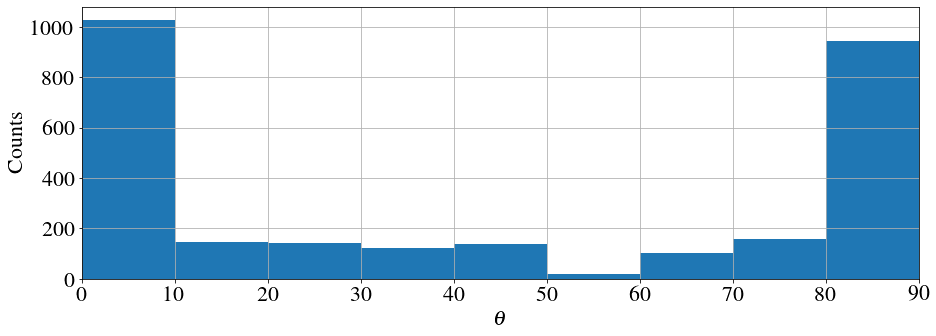

In [11]:
#bins = np.linspace(data['Density_L'].values.min(), data['Density_L'].values.max(), 20)
#x = np.linspace(0.019,0.08,19)
bins =(0,10,20,30,40,50,60,70,80,90)
f=plt.figure(figsize=(15,5))
plt.hist(data['Ang'].values, bins, alpha=1.0)
plt.ylabel('Counts',fontsize=22)
plt.xlabel(r'$\theta$',fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlim(0,90)
#plt.legend(loc='upper right')
plt.grid()
plt.show()
f.savefig("./fig/count_vs_angle.pdf", bbox_inches='tight')

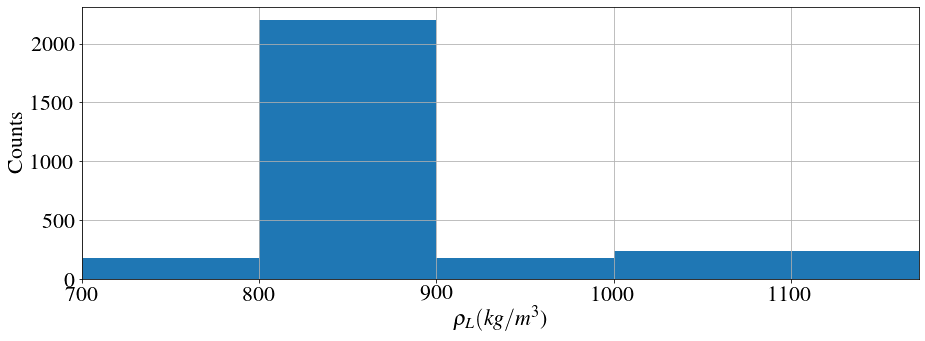

In [12]:
bins =(700,800,900,1000,data['Density_L'].values.max())
f=plt.figure(figsize=(15,5))
plt.hist(data['Density_L'].values, bins, alpha=1.0)
plt.ylabel('Counts',fontsize=22)
plt.xlabel(r'$\rho_L(kg/m^3$)',fontsize=22)
plt.grid()
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlim(700,data['Density_L'].values.max())
plt.show()
f.savefig("./fig/count_vs_density.pdf", bbox_inches='tight')

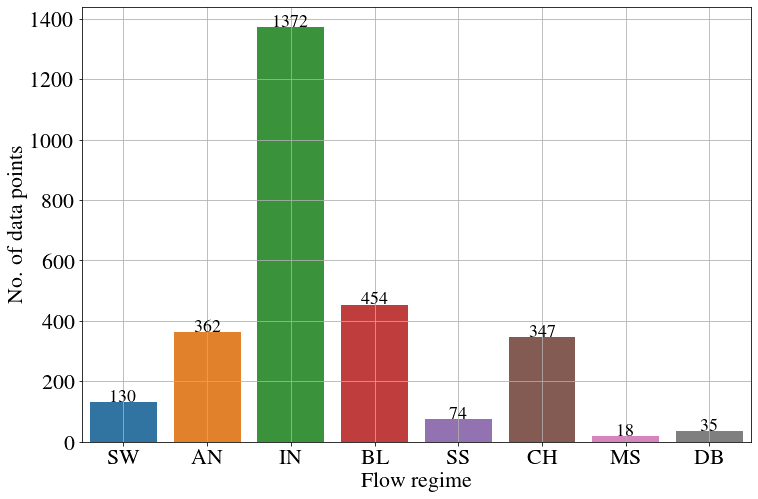

In [13]:
#data['Class_name']=data['Class_name'].replace(['SS', 'I', 'A', 'DB', 'SW', 'B', 'C', 'M'],['Stratified Smoth','Intermittent','Annular','Dispersed Bubble', 'Stratified Wavy','Bubble Flow','Churn','Mist'])
#data['Class_name']=data['Class_name'].replace(['SS', 'I', 'A', 'DB', 'SW', 'B', 'C', 'M'],['SS', 'IN', 'AN', 'DB', 'SW', 'BL', 'CH', 'MS'])

f=plt.figure(figsize = (12, 8))
ocean_plot = sns.countplot(x = 'Class_name', data = data)
for p in ocean_plot.patches:
    ocean_plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points',fontsize=18)
plt.grid()
#plt.title("Count of houses based on their proximity to ocean")
plt.xlabel("Flow regime",fontsize=22)
plt.ylabel("No. of data points",fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
f.savefig("./fig/data_distribution.pdf", bbox_inches='tight')

In [14]:
hannular = pd.read_csv('./fig_cartoon/horizontal/annular.txt',sep='\t').values
hbf = pd.read_csv('./fig_cartoon/horizontal/bf.txt',sep='\t').values
hdb = pd.read_csv('./fig_cartoon/horizontal/db.txt',sep='\t').values
hstratified = pd.read_csv('./fig_cartoon/horizontal/stratified.txt',sep='\t').values
hwavy = pd.read_csv('./fig_cartoon/horizontal/wavy.txt',sep='\t').values
vannular = pd.read_csv('./fig_cartoon/vertical/annular.txt',sep='\t').values
vbf = pd.read_csv('./fig_cartoon/vertical/bf.txt',sep='\t').values
vdb = pd.read_csv('./fig_cartoon/vertical/db.txt',sep='\t').values

In [15]:
vertical = data['Ang'] > 89
data1=data[vertical]
DB= data1.loc[data1['Class_name']=='DB']
SS= data1.loc[data1['Class_name']=='SS']
I= data1.loc[data1['Class_name']=='IN']
A= data1.loc[data1['Class_name']=='AN']
SW= data1.loc[data1['Class_name']=='SW']
B= data1.loc[data1['Class_name']=='BL']
C= data1.loc[data1['Class_name']=='CH']
M= data1.loc[data1['Class_name']=='MS']

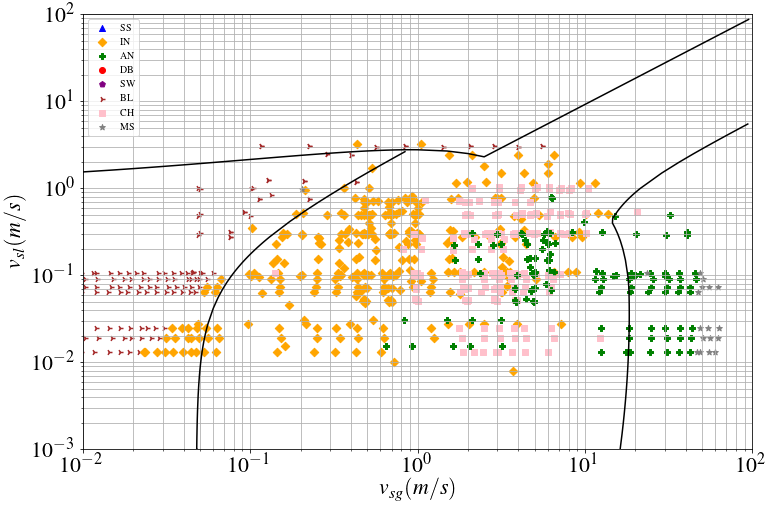

In [16]:
f=plt.figure(figsize = (12, 8))
b=plt.scatter(B['Vsg'],B['Vsl'],marker='4',color='brown')
i=plt.scatter(I['Vsg'],I['Vsl'],marker='D',color='orange')
c=plt.scatter(C['Vsg'],C['Vsl'],marker='s',color='pink')
a=plt.scatter(A['Vsg'],A['Vsl'],marker='P',color='green')
db=plt.scatter(DB['Vsg'],DB['Vsl'],marker='o',color='red')
m=plt.scatter(M['Vsg'],M['Vsl'],marker='*',color='grey')
ss=plt.scatter(SS['Vsg'],SS['Vsl'],marker='^',color='blue')
sw=plt.scatter(SW['Vsg'],SW['Vsl'],marker='p',color='purple')
plt.plot(vannular[:,0],vannular[:,1],color='black')
plt.plot(vbf[:,0],vbf[:,1],color='black')
plt.plot(vdb[:,0],vdb[:,1],color='black')
plt.xscale('log')
plt.yscale('log')
plt.axis([0.01,100,0.01,100])
plt.xticks([0.01, 0.1,1,10,100],fontsize=22)
plt.yticks([0.001, 0.01, 0.1,1,10,100],fontsize=22)
plt.grid(True, which="both")
plt.legend((ss,i,a,db,sw,b,c,m),('SS', 'IN', 'AN', 'DB', 'SW', 'BL', 'CH', 'MS'))
plt.xlabel(r'$v_{sg}(m/s)$',fontsize=22)
plt.ylabel(r'$v_{sl}(m/s)$',fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.show()
f.savefig("./fig/vsl_vs_vsg_vertical.pdf", bbox_inches='tight')

In [17]:
horizontaln = (data['Ang'] < 10.0)
horizontalp = (data['Ang'] > -10.0)
data1=data[horizontaln & horizontalp]
DB= data1.loc[data1['Class_name']=='DB']
SS= data1.loc[data1['Class_name']=='SS']
I= data1.loc[data1['Class_name']=='IN']
A= data1.loc[data1['Class_name']=='AN']
SW= data1.loc[data1['Class_name']=='SW']
B= data1.loc[data1['Class_name']=='BL']
C= data1.loc[data1['Class_name']=='CH']
M= data1.loc[data1['Class_name']=='MS']

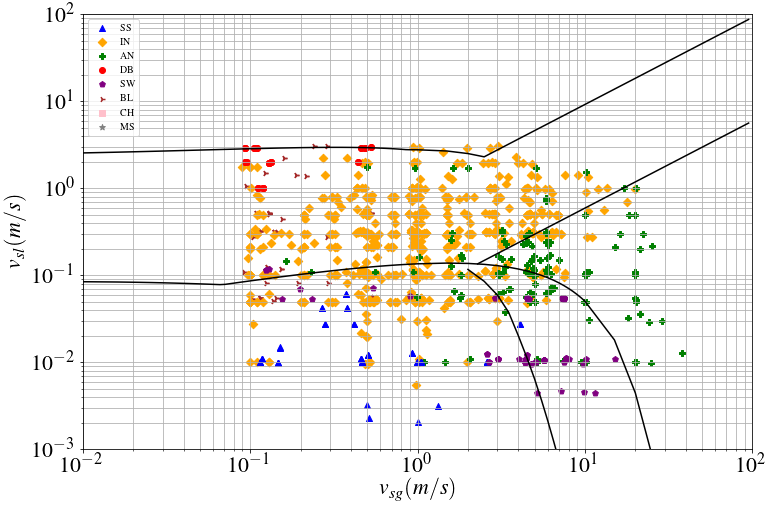

In [18]:
f=plt.figure(figsize = (12, 8))
b=plt.scatter(B['Vsg'],B['Vsl'],marker='4',color='brown')
i=plt.scatter(I['Vsg'],I['Vsl'],marker='D',color='orange')
c=plt.scatter(C['Vsg'],C['Vsl'],marker='s',color='pink')
a=plt.scatter(A['Vsg'],A['Vsl'],marker='P',color='green')
db=plt.scatter(DB['Vsg'],DB['Vsl'],marker='o',color='red')
m=plt.scatter(M['Vsg'],M['Vsl'],marker='*',color='grey')
ss=plt.scatter(SS['Vsg'],SS['Vsl'],marker='^',color='blue')
sw=plt.scatter(SW['Vsg'],SW['Vsl'],marker='p',color='purple')
plt.plot(hannular[:,0],hannular[:,1],color='black')
plt.plot(hbf[:,0],hbf[:,1],color='black')
plt.plot(hdb[:,0],hdb[:,1],color='black')
plt.plot(hstratified[:,0],hstratified[:,1],color='black')
plt.plot(hwavy[:,0],hwavy[:,1],color='black')
plt.xscale('log')
plt.yscale('log')
plt.axis([0.01,100,0.01,100])
plt.xticks([0.01, 0.1,1,10,100],fontsize=22)
plt.yticks([0.001, 0.01, 0.1,1,10,100],fontsize=22)
plt.grid(True, which="both")
plt.legend((ss,i,a,db,sw,b,c,m),('SS', 'IN', 'AN', 'DB', 'SW', 'BL', 'CH', 'MS'))
plt.xlabel(r'$v_{sg}(m/s)$',fontsize=22)
plt.ylabel(r'$v_{sl}(m/s)$',fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.show()
f.savefig("./fig/vsl_vs_vsg_horizontal.pdf", bbox_inches='tight')

In [19]:
Y=data[['Class_id','model']].values
X=data[['Vsl','Vsg','Ang','Density_L','Density_G','Visc_L','Visc_G','ST']].values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
#X=data[['Vsl','Vsg','ID','Roughness','Ang','Density_L','Density_G','Visc_L','Visc_G','ST','P','T']].values

In [20]:
print(X.shape)
print(Y.shape)

(2792, 8)
(2792, 2)


In [21]:
X_train, X_test, y_train1, y_test1 = train_test_split(X, Y, test_size=0.2, random_state=1)
#X_train, X_val, y_train1, y_val1 = train_test_split(X_train, y_train1, test_size=0.1, random_state=1)
y_train=y_train1[:,0]
y_test=y_test1[:,0]
y_model_train=y_train1[:,1]
y_model_test=y_test1[:,1]

In [22]:
y_test1

array([[6, 5],
       [7, 5],
       [5, 5],
       ...,
       [6, 5],
       [7, 5],
       [5, 5]], dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm,filename, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    f=plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.colorbar()
    plt.tight_layout()
    f.savefig(filename, bbox_inches='tight')

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs',multi_class='auto',max_iter=10000,C=10000.0,penalty='l2')
lr.fit(X_train,y_train)
y_lr_predict_test = lr.predict(X_test)
y_lr_predict_train = lr.predict(X_train)
LR_train =accuracy_score(y_train, y_lr_predict_train)
LR_test  =accuracy_score(y_test , y_lr_predict_test)

In [26]:
print(LR_train,LR_test)

0.6869682042095835 0.7334525939177102


Normalized confusion matrix


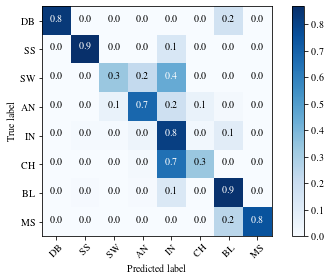

In [27]:
cm = confusion_matrix(y_test, y_lr_predict_test)
classes = ['DB', 'SS', 'SW', 'AN', 'IN', 'CH', 'BL', 'MS']
plot_confusion_matrix(cm, './fig/lr_cm.pdf', classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,)

Normalized confusion matrix


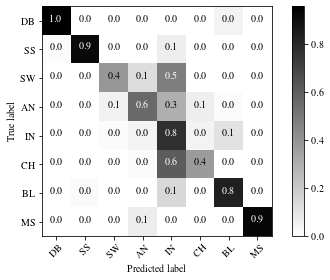

In [28]:
cm = confusion_matrix(y_train, y_lr_predict_train)
classes = ['DB', 'SS', 'SW', 'AN', 'IN', 'CH', 'BL', 'MS']
plot_confusion_matrix(cm, './fig/lr_cm_train.pdf', classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.binary,)

# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
classifier = RandomForestClassifier()
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}
gd_sr = GridSearchCV(estimator=classifier,param_grid=grid_param,scoring='accuracy',cv=5,n_jobs=-1)
gd_sr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [30]:
best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'bootstrap': False, 'criterion': 'gini', 'n_estimators': 1000}
0.9449171518137035


In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=800,bootstrap=True,criterion='entropy',max_depth=20, 
                            min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                            max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                            )
rf.fit(X_train,y_train)
y_rf_predict_test = rf.predict(X_test)
y_rf_predict_train = rf.predict(X_train)
RF_train =accuracy_score(y_train, y_rf_predict_train)
RF_test  =accuracy_score(y_test , y_rf_predict_test)

In [32]:
print(RF_train,RF_test)

0.999552171965965 0.9266547406082289


In [33]:
features_input = ['Vsl','Vsg','Ang','Density_L','Density_G','Visc_L','Visc_G','ST']
for feature in zip(features_input, rf.feature_importances_):
    print(feature)
importance=rf.feature_importances_

('Vsl', 0.14174741134509605)
('Vsg', 0.37124313137592097)
('Ang', 0.09936762964732257)
('Density_L', 0.09706356825252817)
('Density_G', 0.08090360647905062)
('Visc_L', 0.07763217209253737)
('Visc_G', 0.08106595069928316)
('ST', 0.05097653010826103)


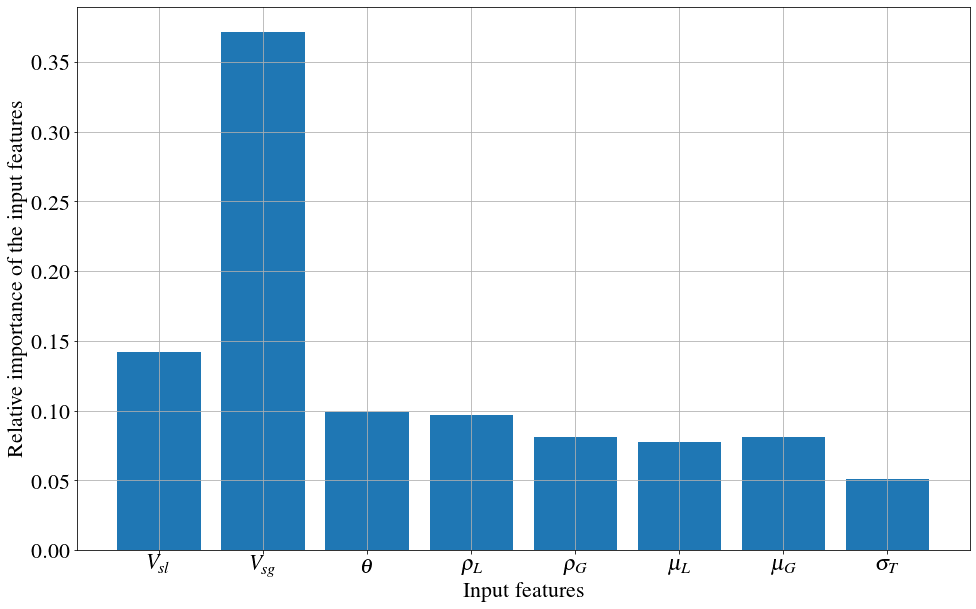

In [34]:
f=plt.figure(figsize=(16,10))
myplt = [importance[0],importance[1],importance[2],importance[3],importance[4],importance[5],importance[6],importance[7]]
plt.bar(range(len(myplt)), myplt)
plt.xticks(range(len(myplt)), ('$V_{sl}$','$V_{sg}$',r'$\theta$',r'$\rho_{L}$',r'$\rho_{G}$',r'$\mu_{L}$',r'$\mu_{G}$',r'$\sigma_{T}$'),fontsize=22)
plt.ylabel('Relative importance of the input features',fontsize=22)
plt.xlabel('Input features',fontsize=22)
plt.yticks(fontsize=22)
plt.grid()
f.savefig('./fig/rf_importance.pdf', bbox_inches='tight')

Normalized confusion matrix


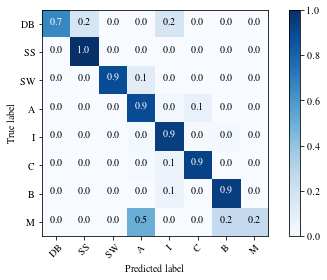

In [35]:
cm = confusion_matrix(y_test, y_rf_predict_test)
classes = ['DB', 'SS', 'SW', 'A', 'I', 'C', 'B', 'M']
plot_confusion_matrix(cm, './fig/rf_cm.pdf', classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,)

Normalized confusion matrix


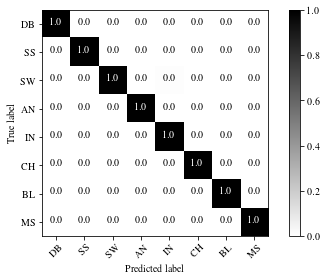

In [36]:
cm = confusion_matrix(y_train, y_rf_predict_train)
classes = ['DB', 'SS', 'SW', 'AN', 'IN', 'CH', 'BL', 'MS']
plot_confusion_matrix(cm, './fig/rf_cm_train.pdf', classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.binary,)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='brute', p=2, metric='minkowski', metric_params=None)
knc.fit(X_train,y_train)
y_knc_predict_test = rf.predict(X_test)
y_knc_predict_train = rf.predict(X_train)
KNC_train=accuracy_score(y_train, y_knc_predict_train)
KNC_test =accuracy_score(y_test , y_knc_predict_test)

In [38]:
print(KNC_train,KNC_test)

0.999552171965965 0.9266547406082289


Normalized confusion matrix


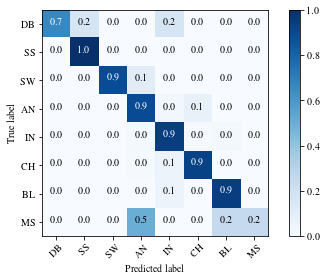

In [39]:
cm = confusion_matrix(y_test, y_knc_predict_test)
classes = ['DB', 'SS', 'SW', 'AN', 'IN', 'CH', 'BL', 'MS']
plot_confusion_matrix(cm, './fig/knc_cm.pdf', classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,)

Normalized confusion matrix


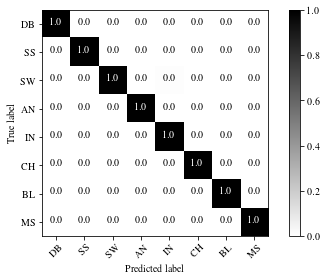

In [40]:
cm = confusion_matrix(y_train, y_knc_predict_train)
classes = ['DB', 'SS', 'SW', 'AN', 'IN', 'CH', 'BL', 'MS']
plot_confusion_matrix(cm, './fig/knc_cm_train.pdf', classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.binary,)

In [41]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_xgb_predict_test = xgb.predict(X_test)
y_xgb_predict_train = xgb.predict(X_train)
XGB_train=accuracy_score(y_train, y_xgb_predict_train)
XGB_test =accuracy_score(y_test , y_xgb_predict_test)

Normalized confusion matrix


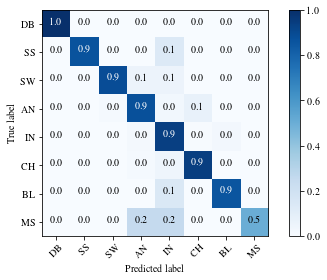

In [42]:
cm = confusion_matrix(y_test, y_xgb_predict_test)
classes = ['DB', 'SS', 'SW', 'AN', 'IN', 'CH', 'BL', 'MS']
plot_confusion_matrix(cm, './fig/xgb_cm.pdf', classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,)

Normalized confusion matrix


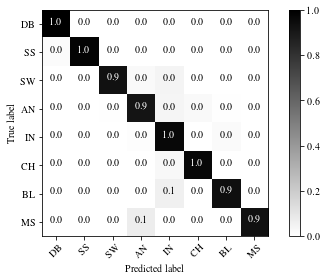

In [43]:
cm = confusion_matrix(y_train, y_xgb_predict_train)
classes = ['DB', 'SS', 'SW', 'AN', 'IN', 'CH', 'BL', 'MS']
plot_confusion_matrix(cm, './fig/xgb_cm_train.pdf', classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.binary,)

In [44]:
from sklearn.svm import SVC
svc = SVC(C=100.0, kernel='rbf', degree=3, gamma=0.1, 
          coef0=0.0, shrinking=True, probability=False, 
          tol=0.001, cache_size=200, class_weight=None, 
          verbose=True, max_iter=-1, decision_function_shape='ovr')
svc.fit(X_train, y_train)
y_svc_predict_test = svc.predict(X_test)
y_svc_predict_train = svc.predict(X_train)
SVC_train=accuracy_score(y_train, y_svc_predict_train)
SVC_test =accuracy_score(y_test , y_svc_predict_test)

[LibSVM]

Normalized confusion matrix


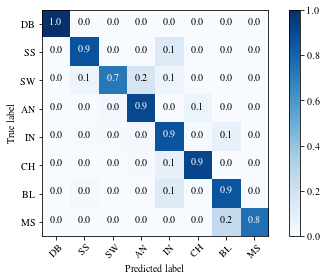

In [45]:
cm = confusion_matrix(y_test, y_svc_predict_test)
classes = ['DB', 'SS', 'SW', 'AN', 'IN', 'CH', 'BL', 'MS']
plot_confusion_matrix(cm, './fig/svc_cm.pdf', classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,)

Normalized confusion matrix


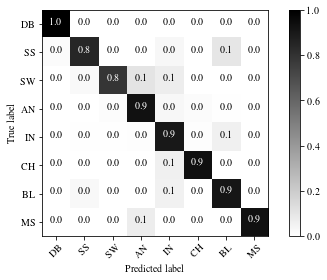

In [46]:
cm = confusion_matrix(y_train, y_svc_predict_train)
classes = ['DB', 'SS', 'SW', 'AN', 'IN', 'CH', 'BL', 'MS']
plot_confusion_matrix(cm, './fig/svc_cm_train.pdf', classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.binary,)

Normalized confusion matrix


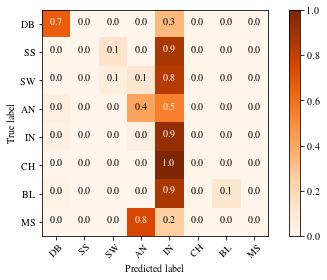

In [47]:
cm = confusion_matrix(y_test, y_model_test)
classes = ['DB', 'SS', 'SW', 'AN', 'IN', 'CH', 'BL', 'MS']
plot_confusion_matrix(cm, './fig/model.pdf', classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges,)

Normalized confusion matrix


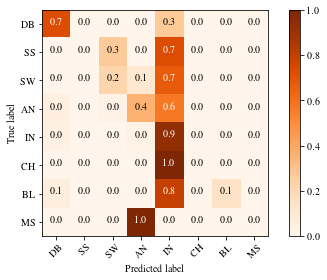

In [48]:
cm = confusion_matrix(y_train, y_model_train)
classes = ['DB', 'SS', 'SW', 'AN', 'IN', 'CH', 'BL', 'MS']
plot_confusion_matrix(cm, './fig/model_train.pdf', classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges,)

In [49]:
model_train=accuracy_score(y_train, y_model_train)
model_test =accuracy_score(y_test , y_model_test)

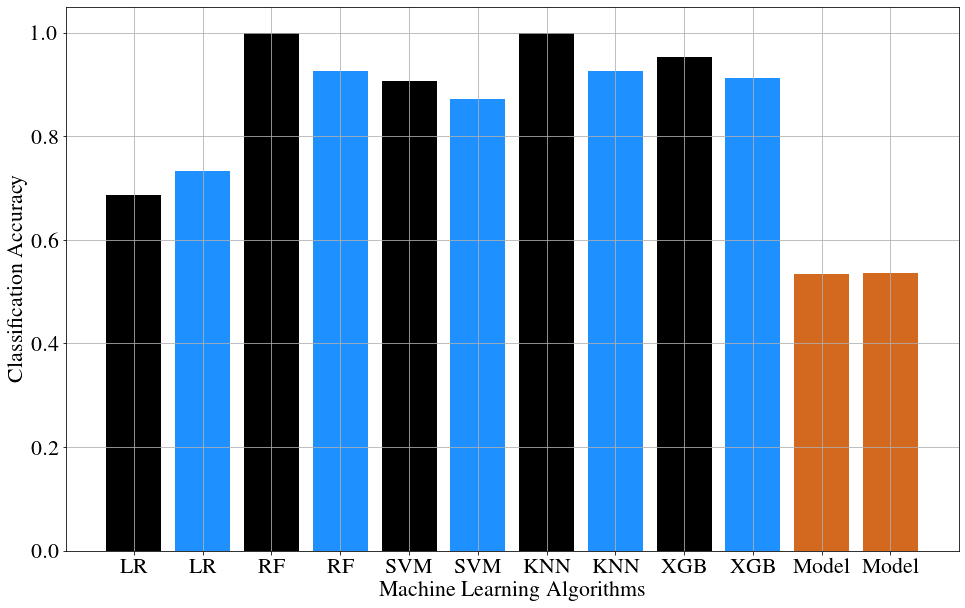

In [50]:
f=plt.figure(figsize=(16,10))
myplt = [LR_train, LR_test, RF_train, RF_test, SVC_train ,SVC_test,KNC_train,KNC_test,XGB_train,XGB_test,model_train,model_test]
plt.bar(range(len(myplt)), myplt,color=['black', 'dodgerblue', 'black', 'dodgerblue', 'black','dodgerblue', 'black', 'dodgerblue', 'black', 'dodgerblue','chocolate', 'chocolate'])
plt.xticks(range(len(myplt)), ('LR', 'LR','RF','RF','SVM','SVM','KNN','KNN','XGB','XGB','Model','Model'),fontsize=22)
plt.ylabel('Classification Accuracy',fontsize=22)
plt.xlabel('Machine Learning Algorithms',fontsize=22)
plt.yticks(fontsize=22)
plt.grid()
f.savefig('./fig/accuracy_histogram.pdf', bbox_inches='tight')